In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

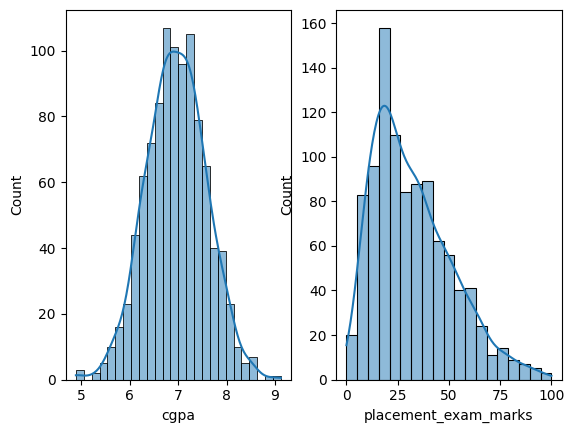

In [13]:
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde =True)
plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde =True)


In [16]:
print(df['cgpa'].mean())
print(df['cgpa'].std())
print(df['cgpa'].min())
print(df['cgpa'].max())

6.96124
0.6158978751323896
4.89
9.12


In [17]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [19]:
#outliers
df[(df['cgpa']>8.808933625397168) | (df['cgpa']<5.113546374602832)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [21]:
#trimming
new_df = df[(df['cgpa']<8.808933625397168) & (df['cgpa']>5.113546374602832)]

In [22]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


<Axes: ylabel='Count'>

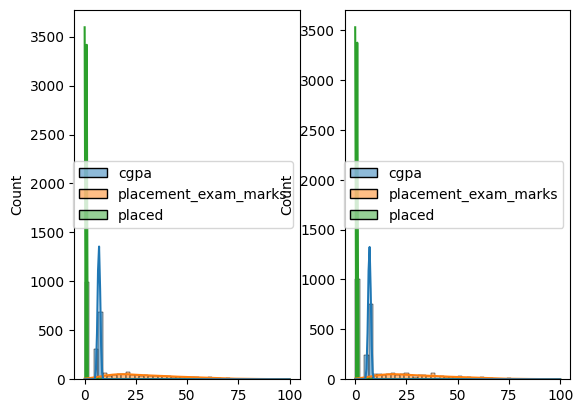

In [26]:
plt.subplot(1,2,1)
sns.histplot(new_df , kde =True)
plt.subplot(1,2,2)
sns.histplot(df , kde =True)

In [28]:
#z_score
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/ df['cgpa'].std()

In [29]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [31]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [36]:
df[(df['cgpa_zscore']<-3) | (df['cgpa_zscore']>3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [41]:
new_df = df[(df['cgpa_zscore']>-3) & (df['cgpa_zscore']<3)]

In [42]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [43]:
#capping
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [44]:
np.where(
    df['cgpa']>upper_limit, upper_limit,
    np.where(df['cgpa']<lower_limit, lower_limit, df['cgpa']))

array([7.19      , 7.46      , 7.54      , 6.42      , 7.23      ,
       7.3       , 6.69      , 7.12      , 6.45      , 7.75      ,
       6.82      , 6.38      , 6.58      , 5.68      , 7.91      ,
       7.1       , 6.53      , 7.56      , 6.93      , 7.63      ,
       6.69      , 7.43      , 6.76      , 6.05      , 6.44      ,
       6.28      , 7.45      , 6.53      , 7.23      , 6.51      ,
       7.46      , 7.66      , 5.91      , 6.23      , 8.15      ,
       7.48      , 6.85      , 8.51      , 6.58      , 7.25      ,
       6.6       , 6.7       , 7.46      , 7.85      , 7.88      ,
       6.92      , 7.3       , 6.92      , 6.29      , 8.23      ,
       6.2       , 6.24      , 7.53      , 6.69      , 8.42      ,
       8.12      , 6.93      , 7.73      , 7.34      , 7.7       ,
       7.94      , 7.51      , 7.61      , 6.22      , 6.98      ,
       6.27      , 6.67      , 8.04      , 6.58      , 7.41      ,
       6.98      , 6.13      , 7.9       , 6.39      , 6.16   

In [45]:
df.shape

(1000, 4)

In [47]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64